# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [12]:
#Type your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

# Set style for visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [13]:
#Type your code here
# Load the dataset
try:
    df = pd.read_csv(r'C:\Users\Ika Rachmawati\SMSML_NIDA\Eksperimen_SML_Nidaannisa19\housingdataset_raw\Bengaluru_House_Data.csv')
    print("Dataset loaded successfully!")
    print(f"Shape: {df.shape}")
    display(df.head())
except FileNotFoundError:
    print("File not found. Please check the file path.")

Dataset loaded successfully!
Shape: (13320, 9)


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [14]:
# Basic info
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [15]:
# Statistical summary
print("\nStatistical Summary:")
display(df.describe(include='all'))


Statistical Summary:


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
count,13320,13320,13319,13304,7818,13320,13247.000000,12711.000000,13320.000000
unique,4,81,1305,31,2688,2117,NaN,NaN,NaN
top,Super built-up Area,Ready To Move,Whitefield,2 BHK,GrrvaGr,1200,NaN,NaN,NaN
freq,8790,10581,540,5199,80,843,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2.692610,1.584376,112.565627
std,NaN,NaN,NaN,NaN,NaN,NaN,1.341458,0.817263,148.971674
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,8.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000,50.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,72.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,2.000000,120.000000


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

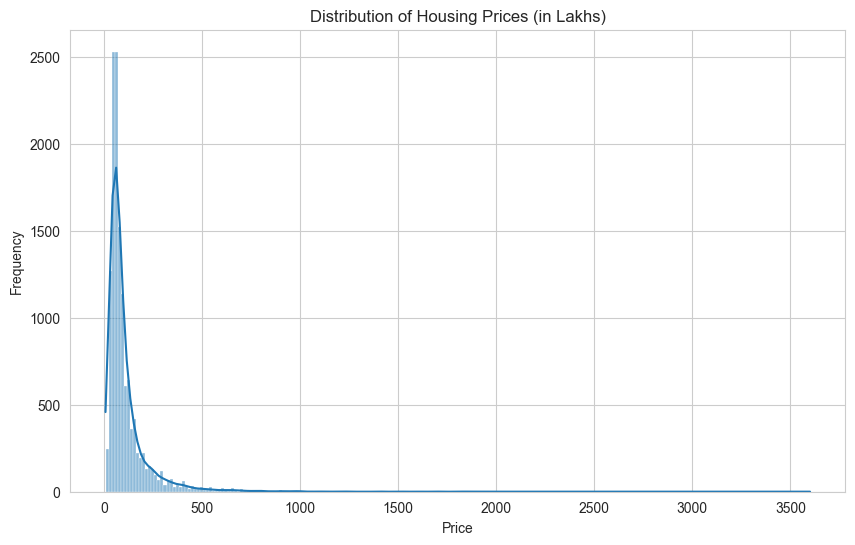

In [16]:
# 4.1 Target Variable Analysis
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Housing Prices (in Lakhs)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [17]:
# 4.2 Handle total_sqft conversion
def convert_sqft_eda(x):
    try:
        if isinstance(x, str) and '-' in x:
            low, high = map(float, x.split('-'))
            return (low + high) / 2
        return float(x)
    except:
        return np.nan
# Apply temporarily for EDA purposes to see numerical distribution
df_eda = df.copy()
df_eda['total_sqft'] = df_eda['total_sqft'].apply(convert_sqft_eda)
df_eda = df_eda.dropna(subset=['total_sqft']) # Drop NaNs for EDA plots

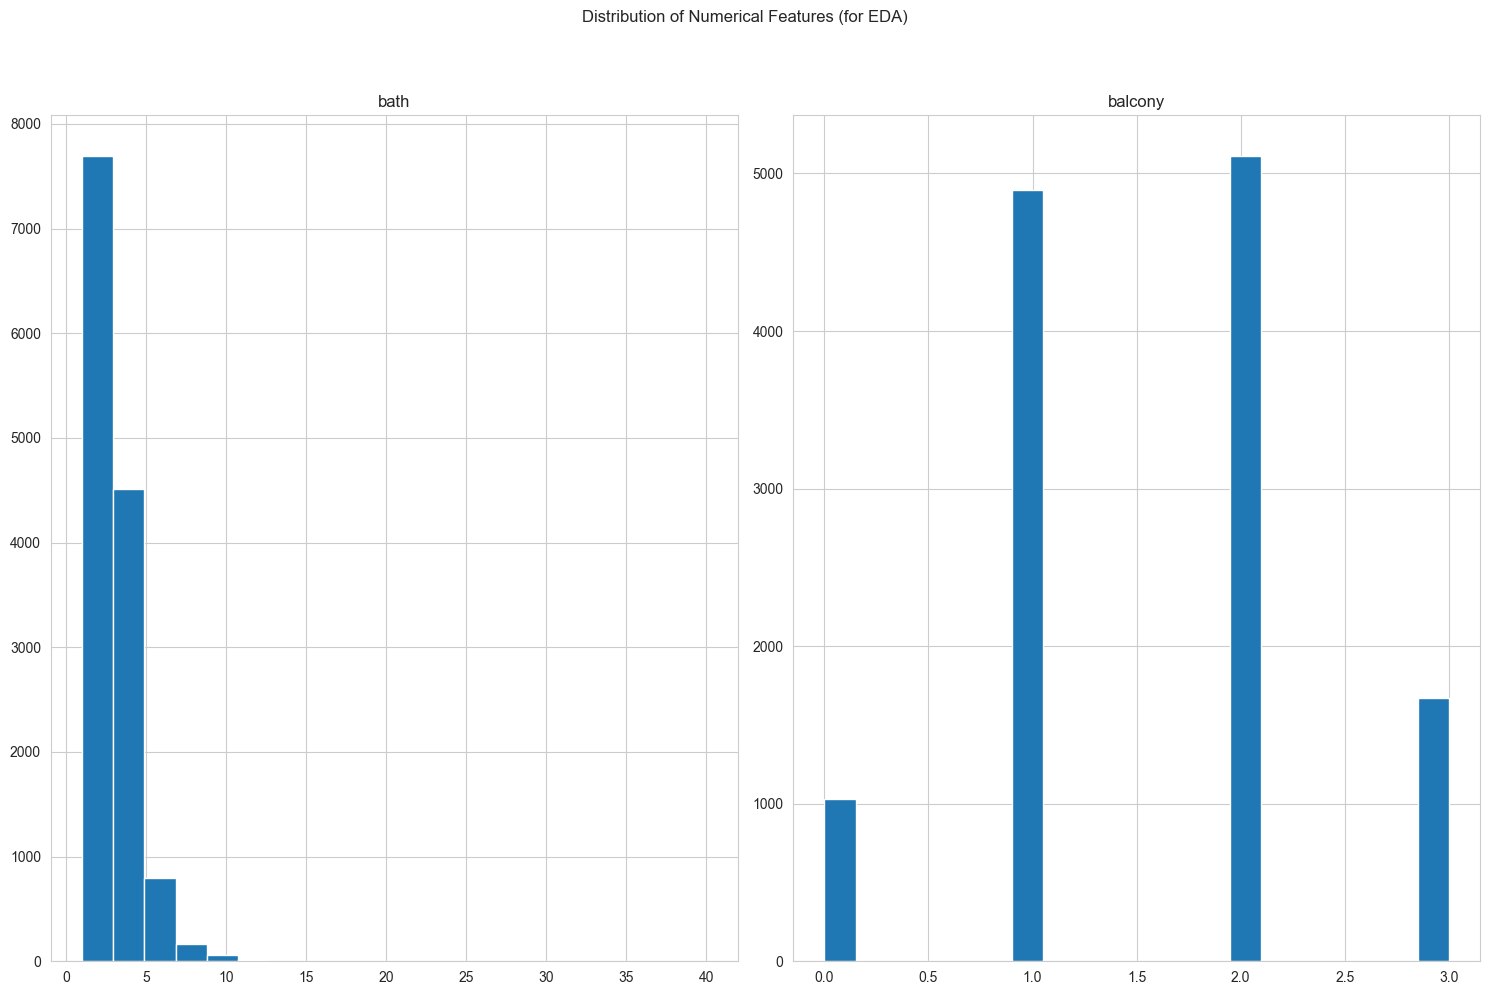

In [18]:
# 4.3 Numerical Features Analysis
num_cols_eda = ['total_sqft', 'bath', 'balcony']
df_eda_numeric_for_hist = df_eda[num_cols_eda]
df[num_cols_eda].hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Features (for EDA)', y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

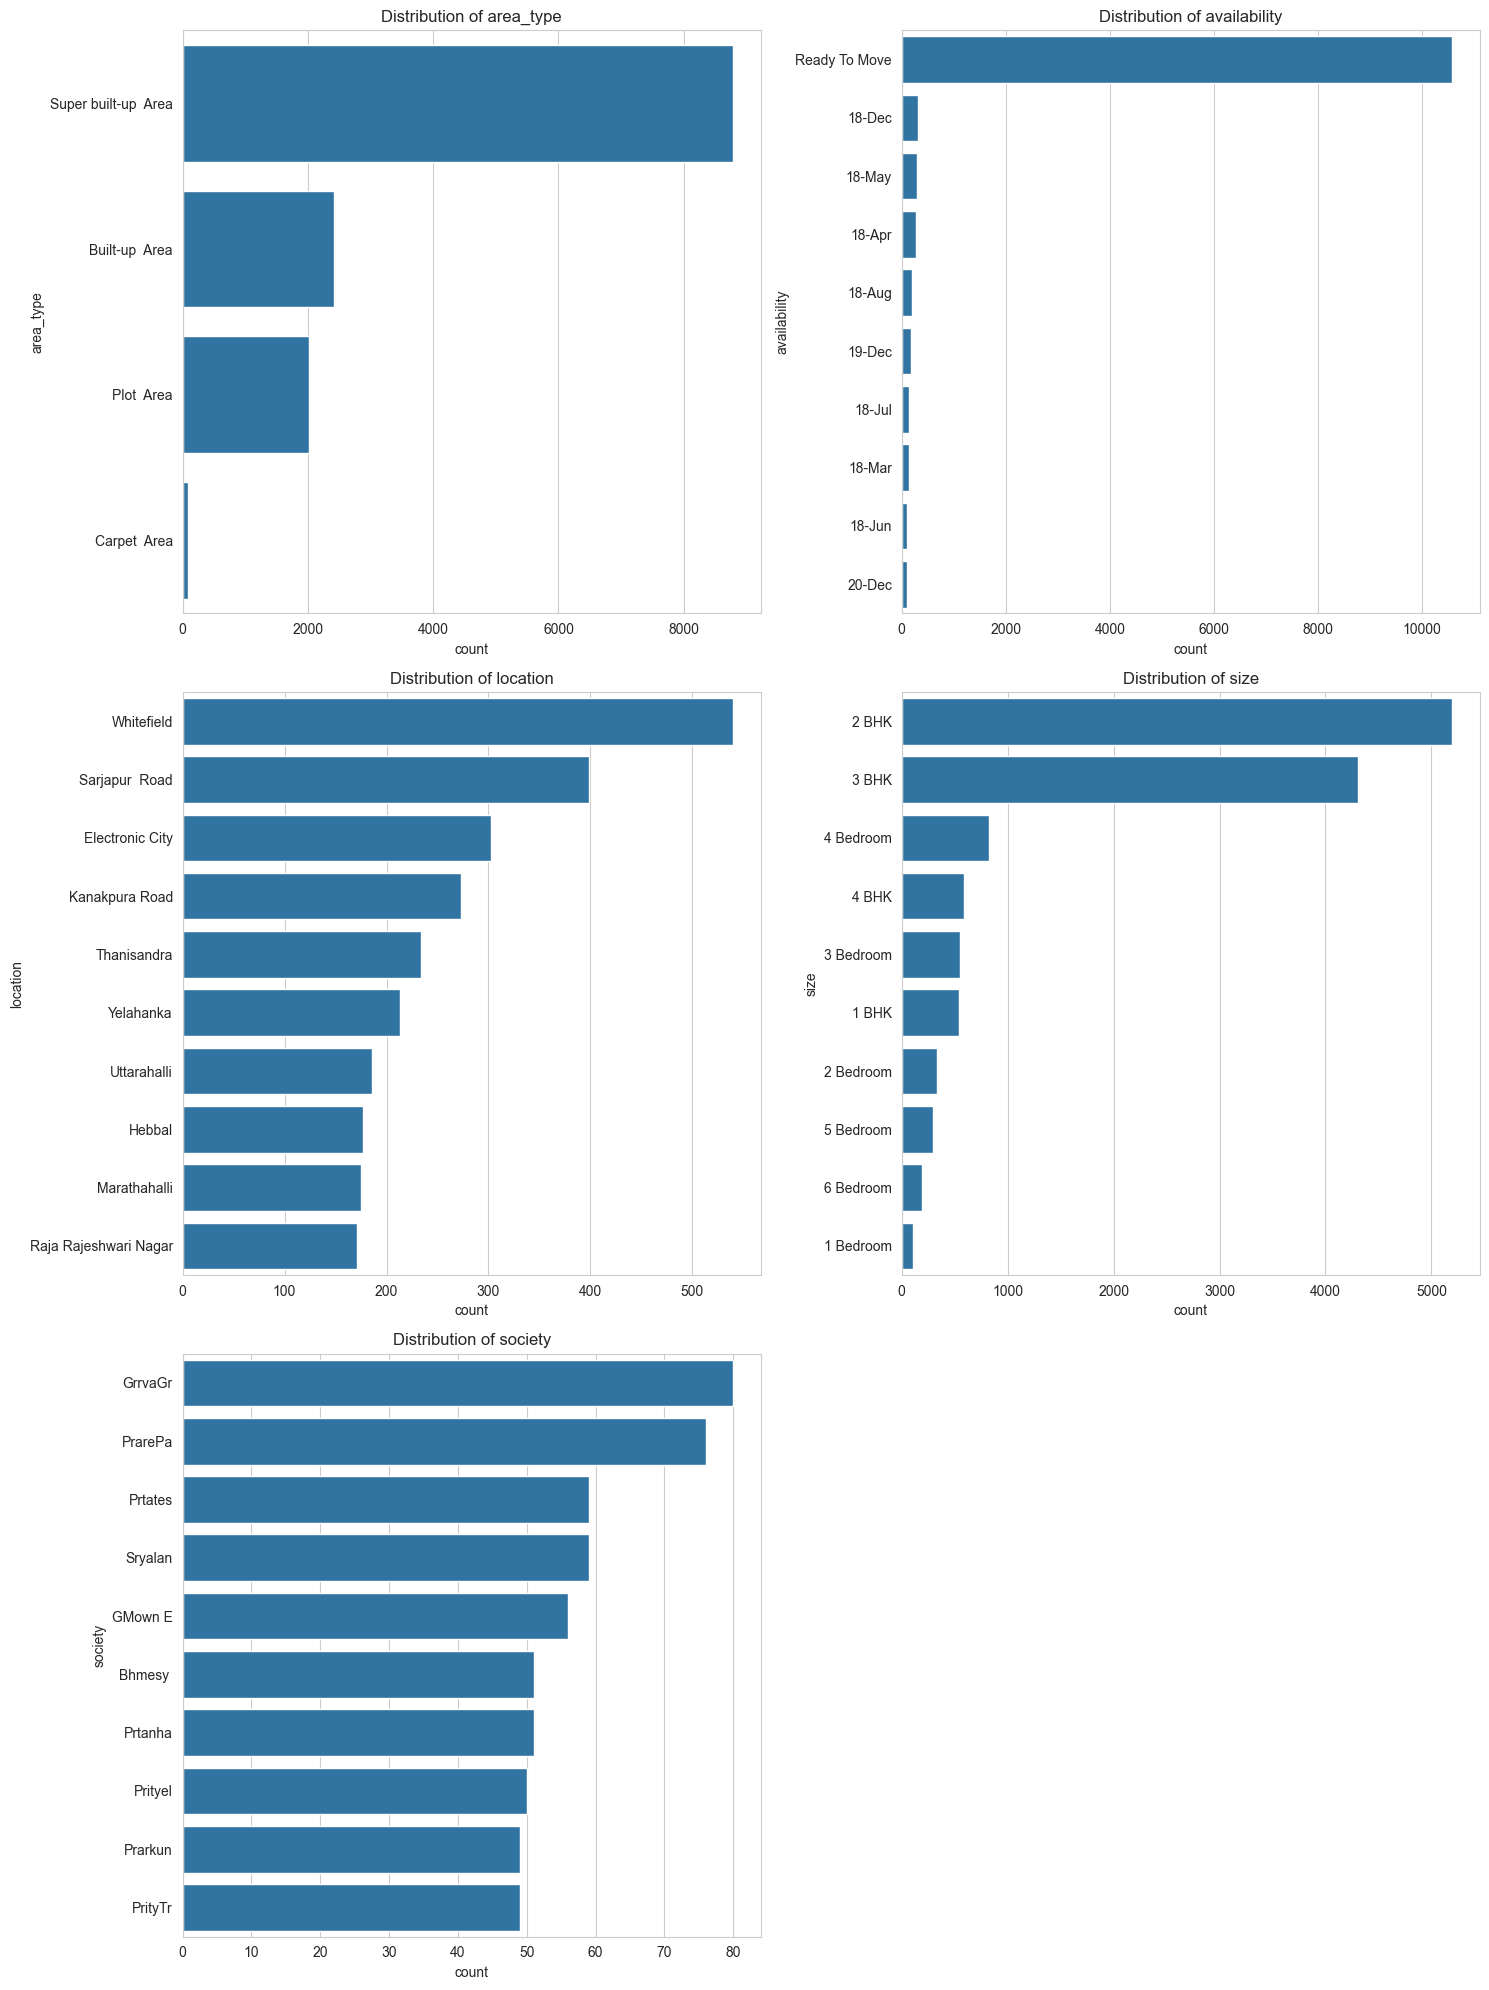

In [19]:
# 4.4 Categorical Features Analysis
cat_cols = ['area_type', 'availability', 'location', 'size', 'society']

plt.figure(figsize=(15, 20))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 2, i)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10])  # Top 10 only
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

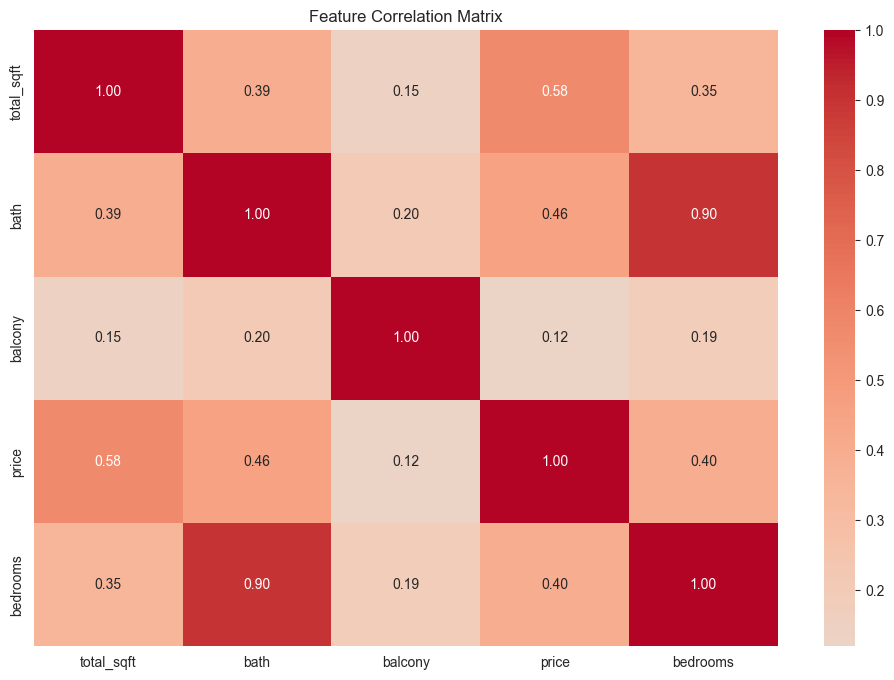

In [20]:
# 4.5 Correlation Analysis
def preprocess_for_correlation(df):
    temp_df = df.copy()

    # Handle total_sqft
    temp_df['total_sqft'] = temp_df['total_sqft'].apply(
        lambda x: np.mean(list(map(float, x.split('-'))) if isinstance(x, str) and '-' in x
        else float(x) if str(x).replace('.','',1).isdigit()
        else np.nan
    ))

    # Convert categorical variables
    for col in ['area_type', 'availability', 'location', 'society']:
        temp_df[col] = temp_df[col].astype('category').cat.codes

    # Extract bedroom count from size
    temp_df['bedrooms'] = temp_df['size'].str.extract('(\d+)').astype(float)

    return temp_df

temp_df = preprocess_for_correlation(df.copy())
plt.figure(figsize=(12, 8))
numerical_features = temp_df.select_dtypes(include=['float64','int64'])
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

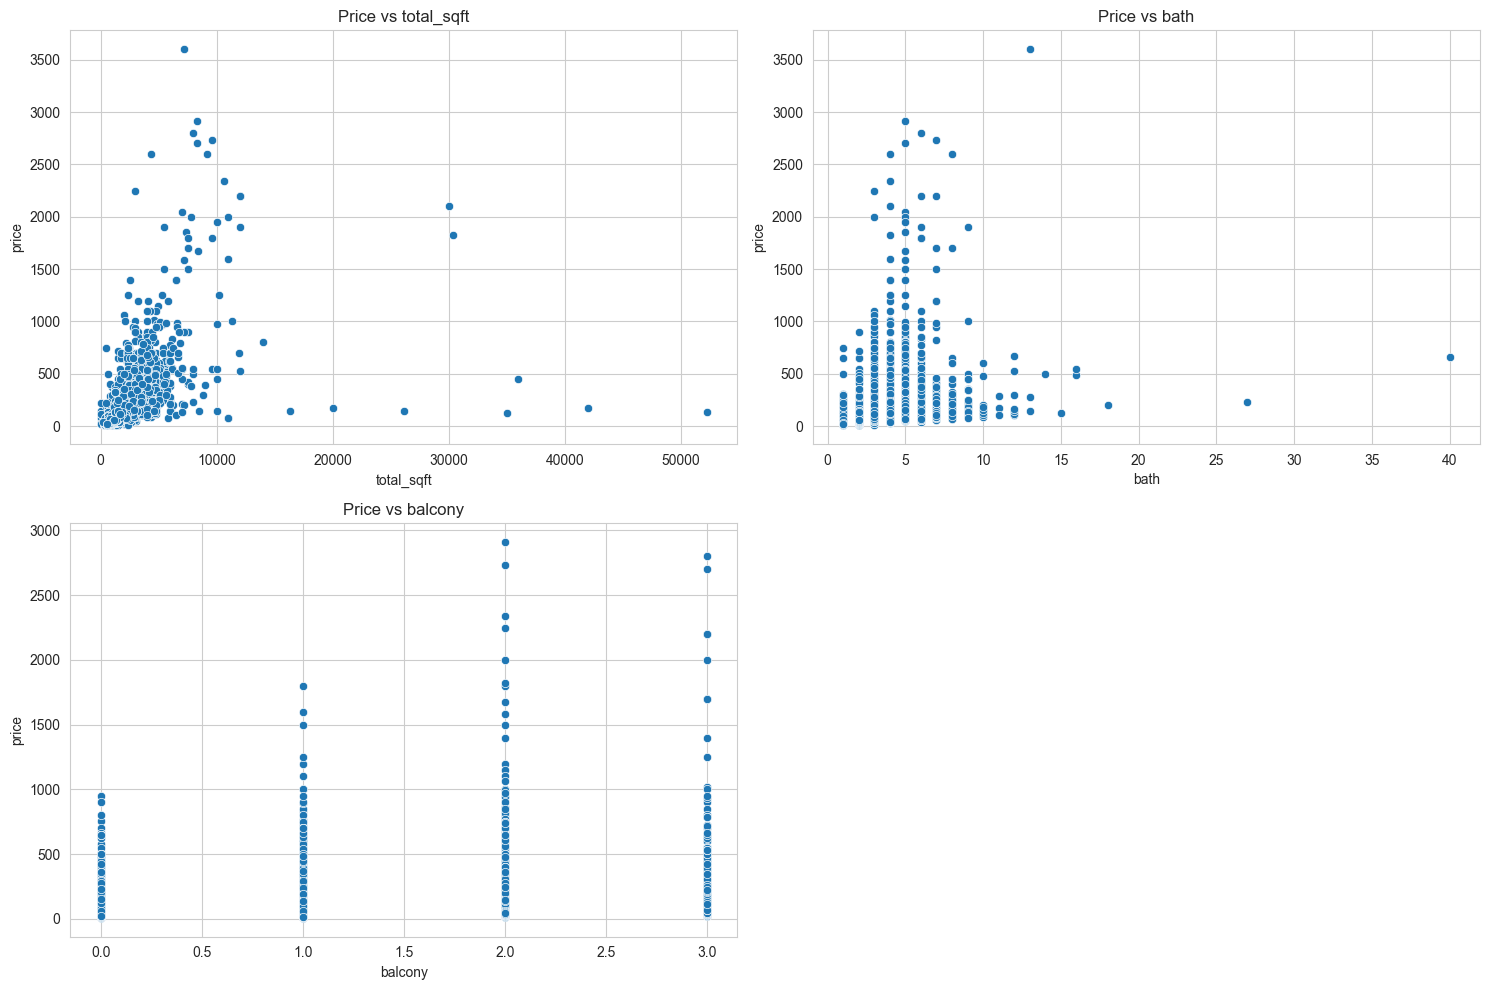

In [21]:
# 4.6 Price vs Numerical Features
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols_eda, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=df_eda[col], y=df_eda['price'])
    plt.title(f'Price vs {col}')
plt.tight_layout()
plt.show()

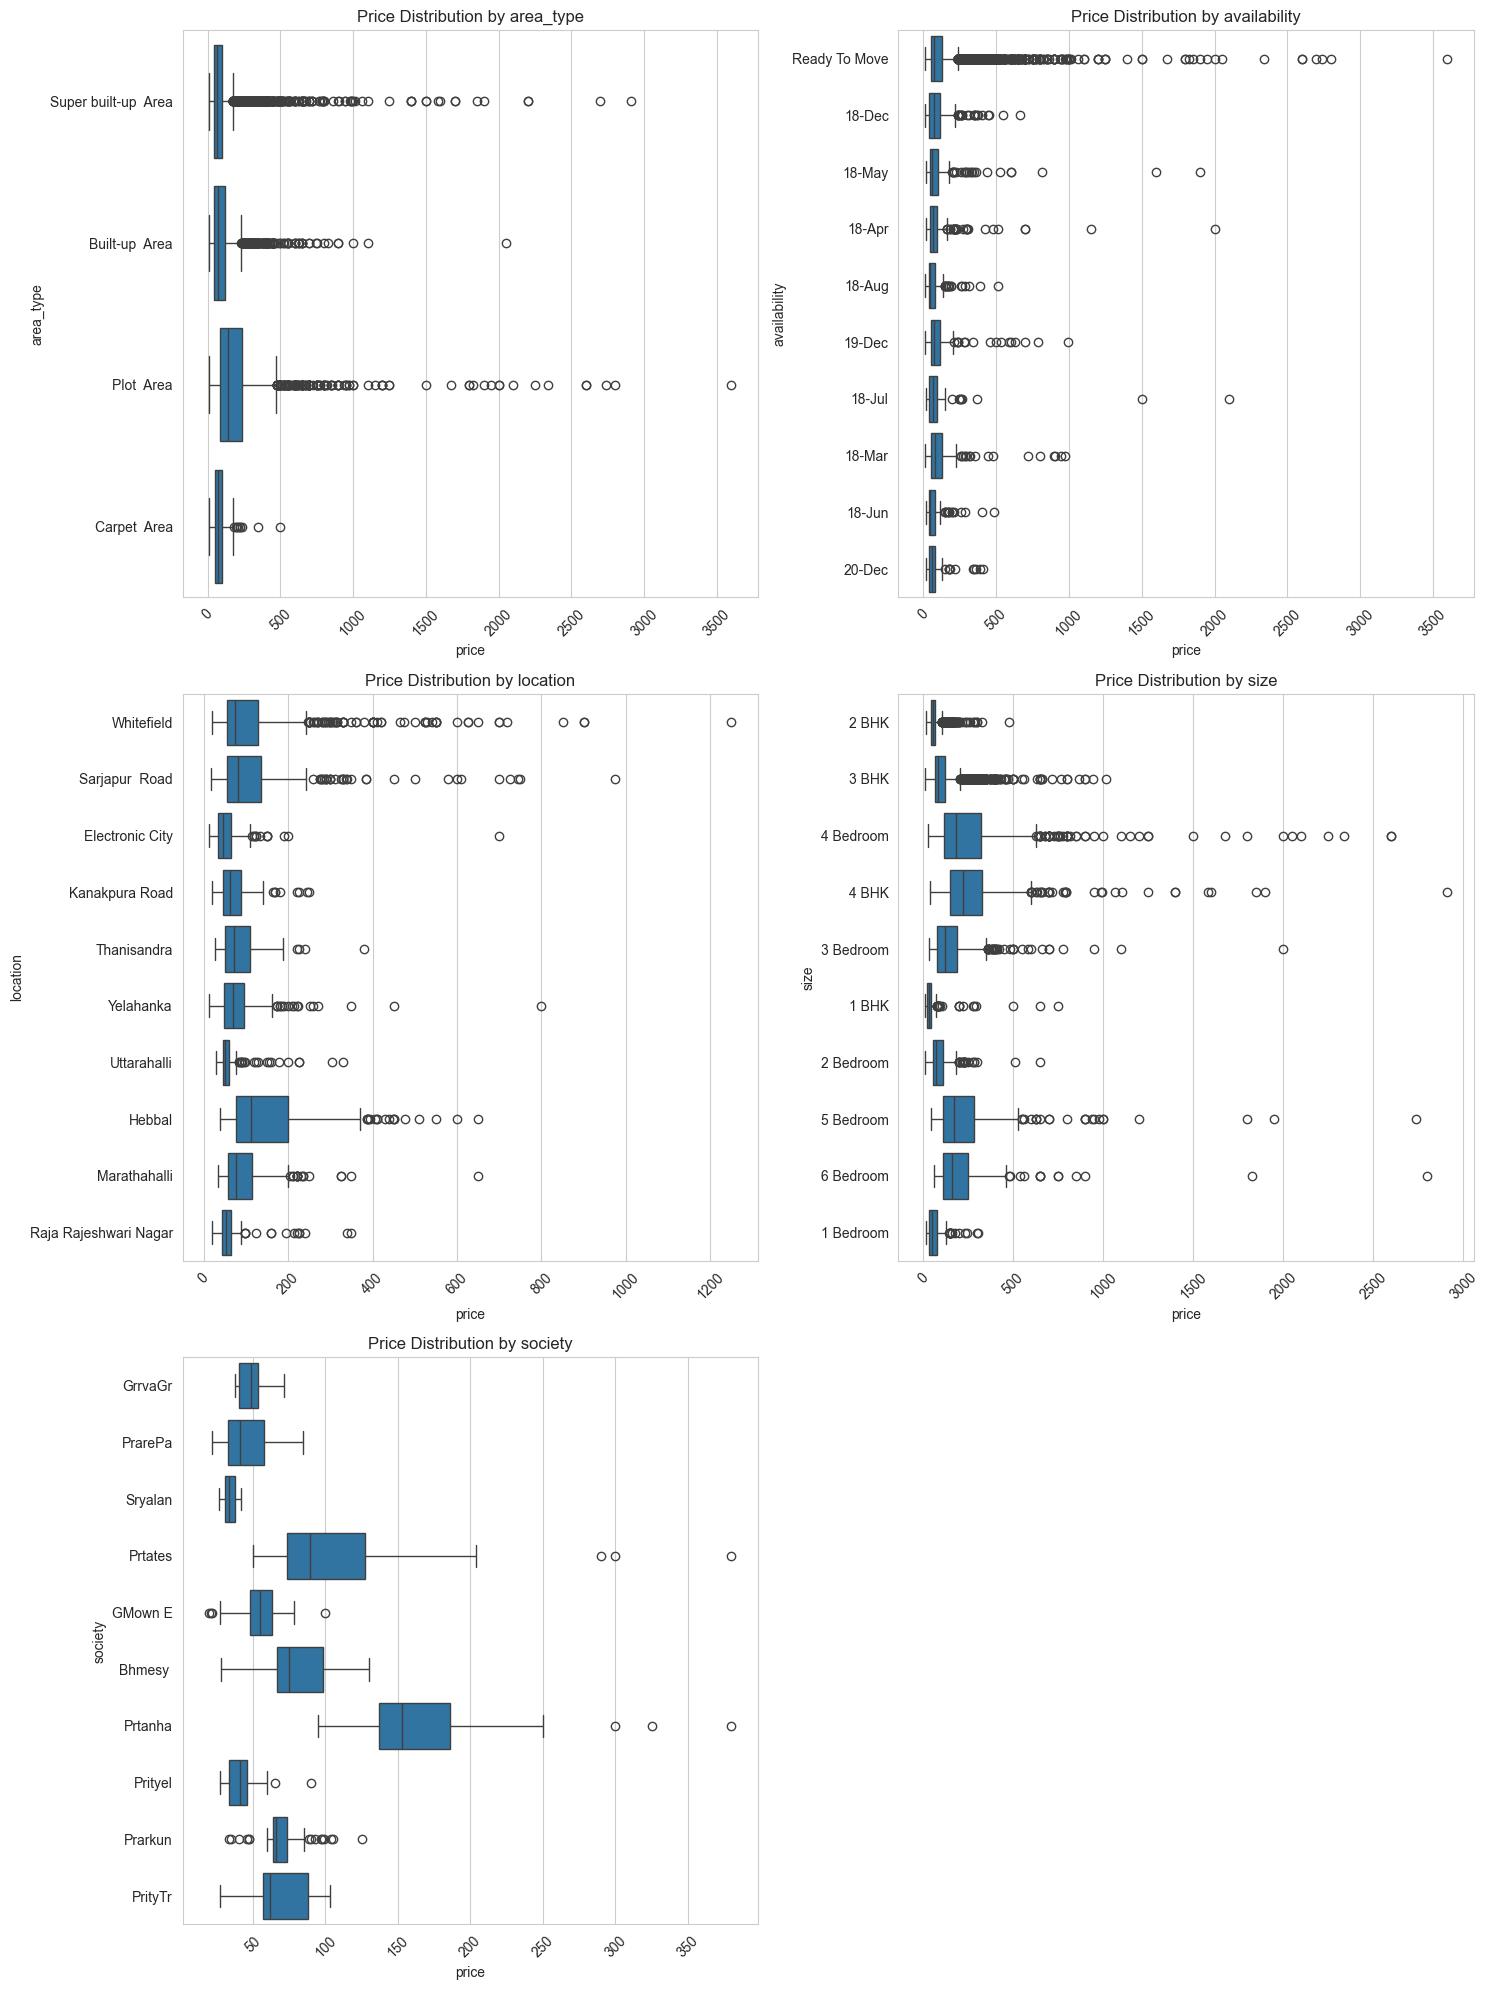

In [22]:
# 4.7 Price vs Categorical Features
plt.figure(figsize=(15, 20))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=df_eda['price'], y=df_eda[col],
               order=df_eda[col].value_counts().index[:10])  # Top 10 only
    plt.title(f'Price Distribution by {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

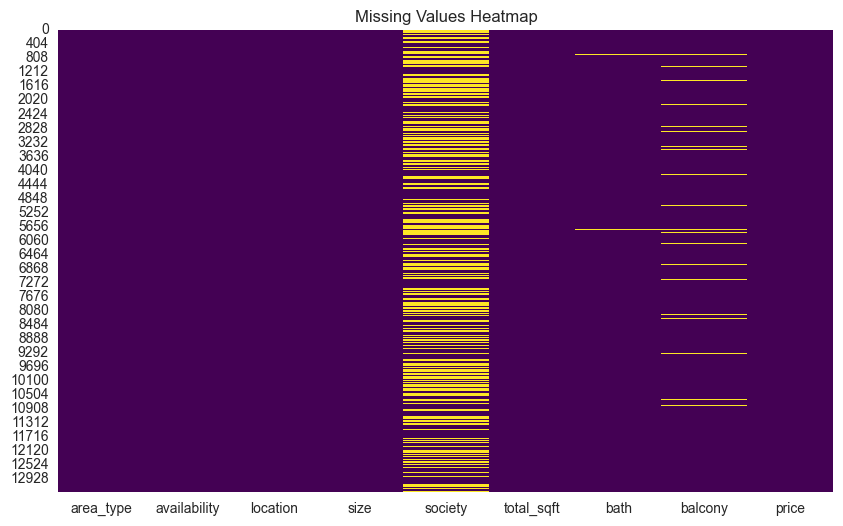


Missing Values Summary:
area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64


In [23]:
# 4.8 Missing Values Analysis
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

print("\nMissing Values Summary:")
print(df.isnull().sum())


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [24]:
#Preprocessing: Initialize DataFrame
df_processed = df.copy() # Work on a copy for preprocessing steps
print("Original DataFrame shape for preprocessing:", df_processed.shape)

Original DataFrame shape for preprocessing: (13320, 9)


In [25]:
# 5.1 Handle Missing Values
print("\nBefore handling missing values (for preprocessing pipeline):")
print(df_processed.isnull().sum())

# If original df has NaNs in 'price' or 'total_sqft' after conversion, they'd be dropped here.
df_processed.dropna(inplace=True) # Apply inplace to df_processed

print("\nAfter dropping rows with missing values (for preprocessing pipeline):")
print(df_processed.isnull().sum())
print(f"Shape after dropping NaNs: {df_processed.shape}")


Before handling missing values (for preprocessing pipeline):
area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

After dropping rows with missing values (for preprocessing pipeline):
area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64
Shape after dropping NaNs: (7496, 9)


In [26]:
# 5.2 Feature Engineering
# Preprocessing: Feature Engineering (BHK)
# Extract numerical value from size (e.g., "2 BHK" -> 2)
df_processed['bedrooms'] = df_processed['size'].str.extract('(\d+)').astype(float)
df_processed.drop('size', axis=1, inplace=True)
print("\nDataFrame after 'bedrooms' feature engineering:")
print(df_processed.head())


DataFrame after 'bedrooms' feature engineering:
               area_type   availability                  location  society  \
0   Super built-up  Area         19-Dec  Electronic City Phase II  Coomee    
1             Plot  Area  Ready To Move          Chikka Tirupathi  Theanmp   
3   Super built-up  Area  Ready To Move        Lingadheeranahalli  Soiewre   
5   Super built-up  Area  Ready To Move                Whitefield  DuenaTa   
11            Plot  Area  Ready To Move                Whitefield  Prrry M   

   total_sqft  bath  balcony   price  bedrooms  
0        1056   2.0      1.0   39.07       2.0  
1        2600   5.0      3.0  120.00       4.0  
3        1521   3.0      1.0   95.00       3.0  
5        1170   2.0      1.0   38.00       2.0  
11       2785   5.0      3.0  295.00       4.0  


In [27]:
# Preprocessing: Convert total_sqft to numerical
# Convert total_sqft to numerical (handle ranges like "1000-1500")
# This function is similar to EDA but applied to the processing copy
def convert_sqft_process(x):
    if isinstance(x, str) and '-' in x:
        low, high = map(float, x.split('-'))
        return (low + high) / 2
    try:
        return float(x)
    except:
        return np.nan

df_processed['total_sqft'] = df_processed['total_sqft'].apply(convert_sqft_process)
df_processed.fillna({'total_sqft': df_processed['total_sqft'].median()}, inplace=True) # Fill NaNs after conversion
print("\nDataFrame after 'total_sqft' conversion and imputation:")
print(df_processed.head())


DataFrame after 'total_sqft' conversion and imputation:
               area_type   availability                  location  society  \
0   Super built-up  Area         19-Dec  Electronic City Phase II  Coomee    
1             Plot  Area  Ready To Move          Chikka Tirupathi  Theanmp   
3   Super built-up  Area  Ready To Move        Lingadheeranahalli  Soiewre   
5   Super built-up  Area  Ready To Move                Whitefield  DuenaTa   
11            Plot  Area  Ready To Move                Whitefield  Prrry M   

    total_sqft  bath  balcony   price  bedrooms  
0       1056.0   2.0      1.0   39.07       2.0  
1       2600.0   5.0      3.0  120.00       4.0  
3       1521.0   3.0      1.0   95.00       3.0  
5       1170.0   2.0      1.0   38.00       2.0  
11      2785.0   5.0      3.0  295.00       4.0  


In [28]:
# Preprocessing: Create price_per_sqft feature
# Create price per sqft feature
# This should happen after total_sqft is clean.
df_processed['price_per_sqft'] = df_processed['price'] / df_processed['total_sqft']
print("\nDataFrame after 'price_per_sqft' feature engineering:")
print(df_processed.head())


DataFrame after 'price_per_sqft' feature engineering:
               area_type   availability                  location  society  \
0   Super built-up  Area         19-Dec  Electronic City Phase II  Coomee    
1             Plot  Area  Ready To Move          Chikka Tirupathi  Theanmp   
3   Super built-up  Area  Ready To Move        Lingadheeranahalli  Soiewre   
5   Super built-up  Area  Ready To Move                Whitefield  DuenaTa   
11            Plot  Area  Ready To Move                Whitefield  Prrry M   

    total_sqft  bath  balcony   price  bedrooms  price_per_sqft  
0       1056.0   2.0      1.0   39.07       2.0        0.036998  
1       2600.0   5.0      3.0  120.00       4.0        0.046154  
3       1521.0   3.0      1.0   95.00       3.0        0.062459  
5       1170.0   2.0      1.0   38.00       2.0        0.032479  
11      2785.0   5.0      3.0  295.00       4.0        0.105925  


In [29]:
# Fill numerical missing values with median
num_cols = ['total_sqft', 'bath', 'balcony']
for col in num_cols:
    df_processed[col].fillna(df_processed[col].median(), inplace=True)


print("\nAfter handling missing values:")
print(df_processed.isnull().sum())


After handling missing values:
area_type         0
availability      0
location          0
society           0
total_sqft        0
bath              0
balcony           0
price             0
bedrooms          0
price_per_sqft    0
dtype: int64


In [30]:
# 5.3 Outlier Handling
# Preprocessing: Outlier Handling (price_per_sqft quantiles)
# Remove properties with extremely low or high price per sqft
# This removes outliers based on the entire dataset's price_per_sqft distribution
lower_limit_pps = df_processed['price_per_sqft'].quantile(0.01)
upper_limit_pps = df_processed['price_per_sqft'].quantile(0.99)
df_processed = df_processed[(df_processed['price_per_sqft'] >= lower_limit_pps) & (df_processed['price_per_sqft'] <= upper_limit_pps)]
print("\nDataFrame after outlier removal (price_per_sqft quantiles):")
print(df_processed.shape)


DataFrame after outlier removal (price_per_sqft quantiles):
(7347, 10)


In [31]:
# Preprocessing: Outlier Handling (price_per_sqft per location)
# Remove price_per_sqft outliers based on standard deviation per location group
def remove_pps_outliers_per_location(df_temp_outlier): # Renamed for clarity
    df_out = pd.DataFrame()
    for key, subdf in df_temp_outlier.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m - st)) & (subdf.price_per_sqft <= (m + st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

df_processed = remove_pps_outliers_per_location(df_processed)
print("\nDataFrame after outlier removal (price_per_sqft per location):")
print(df_processed.shape)


DataFrame after outlier removal (price_per_sqft per location):
(5150, 10)


In [32]:
# Preprocessing: Dimensionality Reduction for Location
# Remove locations with less than 10 data points and group as 'other'
location_stats_processed = df_processed['location'].value_counts(ascending=False)
location_less_than_10_processed = location_stats_processed[location_stats_processed <= 10]
df_processed['location'] = df_processed['location'].apply(lambda x: 'other' if x in location_less_than_10_processed else x)
print("\nDataFrame after 'location' dimensionality reduction:")
print(df_processed['location'].value_counts().head())


DataFrame after 'location' dimensionality reduction:
location
other              1032
Whitefield          298
Sarjapur  Road      240
Electronic City     170
Kanakpura Road      157
Name: count, dtype: int64


In [33]:
# 5.4 Encode Categorical Variables
# Preprocessing: Encoding Categorical Variables
# For society, use only top N societies and group others as 'Other'
top_societies_processed = df_processed['society'].value_counts().head(10).index
df_processed['society'] = df_processed['society'].apply(lambda x: x if x in top_societies_processed else 'Other')

# Similarly for location
top_locations = df_processed['location'].value_counts().head(20).index
df_processed['location'] = df_processed['location'].apply(lambda x: x if x in top_locations else 'Other')


# Create dummy variables for relevant categorical columns
df_processed = pd.get_dummies(df_processed, columns=['area_type', 'availability', 'location', 'society'], drop_first=True) # drop_first avoids multicollinearity
print("\nDataFrame after one-hot encoding categorical features:")
print(df_processed.head())
print(f"Shape after one-hot encoding: {df_processed.shape}")


DataFrame after one-hot encoding categorical features:
   total_sqft  bath  balcony  price  bedrooms  price_per_sqft  \
0      1672.0   3.0      2.0  150.0       3.0        0.089713   
1      1750.0   3.0      3.0  149.0       3.0        0.085143   
2      1750.0   3.0      2.0  150.0       3.0        0.085714   
3      1425.0   2.0      2.0   65.0       3.0        0.045614   
4      1705.0   3.0      2.0   75.0       3.0        0.043988   

   area_type_Carpet  Area  area_type_Plot  Area  \
0                   False                 False   
1                   False                 False   
2                   False                 False   
3                   False                 False   
4                   False                 False   

   area_type_Super built-up  Area  availability_15-Jun  ...  society_Dhalsh   \
0                            True                False  ...            False   
1                           False                False  ...            False   
2     

In [34]:
# 5.5 Prepare Features and Target
# Preprocessing: Prepare Features and Target
# Final drop of original categorical columns if they were one-hot encoded now (they are handled by get_dummies)
# Final DataFrame for training
X = df_processed.drop(['price', 'price_per_sqft'], axis='columns')
y = df_processed['price']
print("\nFinal X (features) shape:", X.shape)
print("Final y (target) shape:", y.shape)


Final X (features) shape: (5150, 100)
Final y (target) shape: (5150,)


In [35]:
# 5.6 Train-Test Split
# Preprocessing: Train-Test Split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nData split into training and testing sets:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


Data split into training and testing sets:
X_train shape: (4120, 100)
X_test shape: (1030, 100)
y_train shape: (4120,)
y_test shape: (1030,)


In [36]:
# 5.7 Create Preprocessing Pipeline
# Preprocessing: Create and Apply Preprocessing Pipeline
# Numerical features pipeline
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical features pipeline
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')), # For any remaining NaNs in cats
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False)) # sparse_output=False for dense array
])


# Re-list features for the ColumnTransformer based on the actual columns in X
# that will be passed to it.
num_features_pipeline = [col for col in ['total_sqft', 'bath', 'balcony', 'bedrooms', 'price_per_sqft'] if col in X.columns]
cat_features_pipeline = [col for col in ['area_type', 'availability', 'location', 'society'] if col in X.columns]

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features_pipeline),
    ('cat', cat_pipeline, cat_features_pipeline)
])

# Apply Preprocessing
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("\nPreprocessing completed!")
print(f"Training set shape after preprocessing: {X_train_processed.shape}")
print(f"Test set shape after preprocessing: {X_test_processed.shape}")


Preprocessing completed!
Training set shape after preprocessing: (4120, 4)
Test set shape after preprocessing: (1030, 4)


In [37]:
# 5.8 Apply Preprocessing
#  Model Training: Linear Regression
# Linear Regression
print("\n--- Linear Regression Model ---")
lr_regressor = LinearRegression()
lr_regressor.fit(X_train, y_train)
lr_predictions = lr_regressor.predict(X_test)
print("Linear Regression R-squared:", r2_score(y_test, lr_predictions))
print("Linear Regression Mean Squared Error:", mean_squared_error(y_test, lr_predictions))




--- Linear Regression Model ---
Linear Regression R-squared: 0.8049534920588598
Linear Regression Mean Squared Error: 617.0781310649171


In [38]:
# Model Training: Random Forest Regressor
# Random Forest Regressor
print("\n--- Random Forest Regressor Model ---")
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
rf_predictions = rf_regressor.predict(X_test)
print("Random Forest R-squared:", r2_score(y_test, rf_predictions))
print("Random Forest Mean Squared Error:", mean_squared_error(y_test, rf_predictions))



--- Random Forest Regressor Model ---


Random Forest R-squared: 0.8240150297590451
Random Forest Mean Squared Error: 556.7722164222238


In [39]:
# Save Preprocessed Data (Crucial for automate_nida.py)
import os
# Ensure PROCESSED_DATA_DIR is defined or constructed. For this experimental notebook, it's relative.
PROCESSED_DATA_DIR = 'housing_preprocessing'
os.makedirs(PROCESSED_DATA_DIR, exist_ok=True)

# Let's save X_train, X_test, y_train, y_test *after* dimensionality reduction and OHE, but *before* StandardScaler/OneHotEncoder pipeline.
# This means saving X and y from 5.5. This seems to be the intended meaning for 'housing_preprocessing'.
X.to_csv(os.path.join(PROCESSED_DATA_DIR, 'X_train.csv'), index=False)
X_test.to_csv(os.path.join(PROCESSED_DATA_DIR, 'X_test.csv'), index=False)
y_train.to_csv(os.path.join(PROCESSED_DATA_DIR, 'y_train.csv'), index=False)
y_test.to_csv(os.path.join(PROCESSED_DATA_DIR, 'y_test.csv'), index=False)

print("\nProcessed data saved to", PROCESSED_DATA_DIR)
print("\nScript execution complete.")


Processed data saved to housing_preprocessing

Script execution complete.
